### 01_Exercise
Task
* Build, train, and evaluate a neural network with Pytorch.
* It should have minimum ***2 hidden*** layers 
* Experiment with at least ***5 different variations*** of hyperparameters (n layers / neurons, activation function, epochs, optimizers, learning rate etc.).
* Use gradio to build a simple interactive demo (in the notebook).

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### 1. data import and Feature selection.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Brlsadiksha/project/main/hr_final.csv?token=GHSAT0AAAAAAB6FESXTL3WEJUZ25ZE6Y4XIY6456WQ')

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age_tier,distancehome_tier,JobRole_tier,MonthlyIncome_tier
0,0,51,0,2,2,6,2,1,0,1,...,0,3,3,3.0,4.0,2.0,3,3,4,5
1,1,31,1,1,1,10,1,1,0,1,...,4,2,4,3.0,2.0,4.0,1,3,1,3
2,2,32,0,1,1,17,4,4,1,4,...,3,3,3,2.0,2.0,1.0,1,2,1,5
3,3,38,0,0,1,2,5,1,1,3,...,5,2,3,4.0,4.0,3.0,1,4,4,4
4,4,32,0,2,1,10,1,3,1,1,...,4,3,3,4.0,1.0,3.0,1,3,1,1


We selected data and features from our first project 'HR Attrition'.
We used 4 input data: 'TotalWorkingYears', 'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance' and output data:  'Attrition'.
The input data is from the most important features operation.

In [4]:
# features selection
df_s = df[['TotalWorkingYears','MonthlyIncome','JobSatisfaction','WorkLifeBalance','Attrition']]

In [5]:
df_s.head()

,TotalWorkingYears,MonthlyIncome,JobSatisfaction,WorkLifeBalance,Attrition
0,1.0,131160,4.0,2.0,0
1,6.0,41890,2.0,4.0,1
2,5.0,193280,2.0,1.0,0
3,13.0,83210,4.0,3.0,0
4,9.0,23420,1.0,3.0,0


In [6]:
df_s.shape

(4382, 5)

#### 2. Standard ML preprocessing

In [7]:
# Standard ML preprocessing, Scaling
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_s[['TotalWorkingYears','MonthlyIncome','JobSatisfaction','WorkLifeBalance']])
data = pd.DataFrame(data_scaled, columns=['TotalWorkingYears','MonthlyIncome','JobSatisfaction','WorkLifeBalance'])

In [8]:
data.head()

,TotalWorkingYears,MonthlyIncome,JobSatisfaction,WorkLifeBalance
0,0.025,0.637546,1.000000,0.333333
1,0.150,0.167457,0.333333,1.000000
2,0.125,0.964666,0.333333,0.000000
3,0.325,0.385045,1.000000,0.666667
4,0.225,0.070195,0.000000,0.666667


In [10]:
data_all = pd.concat([df_s['Attrition'], data], axis=1)
data_all.head()

,Attrition,TotalWorkingYears,MonthlyIncome,JobSatisfaction,WorkLifeBalance
0,0,0.025,0.637546,1.000000,0.333333
1,1,0.150,0.167457,0.333333,1.000000
2,0,0.125,0.964666,0.333333,0.000000
3,0,0.325,0.385045,1.000000,0.666667
4,0,0.225,0.070195,0.000000,0.666667


In [11]:
# Train-test split.
data_x = torch.tensor(data_all[['TotalWorkingYears','MonthlyIncome','JobSatisfaction','WorkLifeBalance']].values.astype(np.float32))
data_y = torch.tensor(data_all[['Attrition']].values.astype(np.float32))

In [12]:
print(data_x.size())
print(data_y.size())

torch.Size([4382, 4])
torch.Size([4382, 1])


In [13]:
X_train , X_test , y_train ,y_test = train_test_split(data_x , data_y, test_size=0.2 , random_state= 52)
print(X_train.shape)
print(y_train.shape)

torch.Size([3505, 4])
torch.Size([3505, 1])


In [14]:
print(X_test.shape)
print(y_test.shape)

torch.Size([877, 4])
torch.Size([877, 1])


#### 4. Define a training loop and training the model.
Experiment with at least 5 different variations of hyperparameters (n layers / neurons, activation function, epochs, optimizers, learning rate etc.).

we will run with 5 different variations, 
1. n layer = 3 (include output layer: 2 hidden layer and 1 output layer), 4 (include output layer: 3 hidden layer and 1 output layer)
2. epochs = 50 and 100
3. hidden activation function =ReLU / Sigmoid / Tanh
4. output layer function = Sigmoid / Softmax Activation
5. learning rate = 0.01 / 0.05


why we choose Binary & Muliticlassification as output layer Activation function?

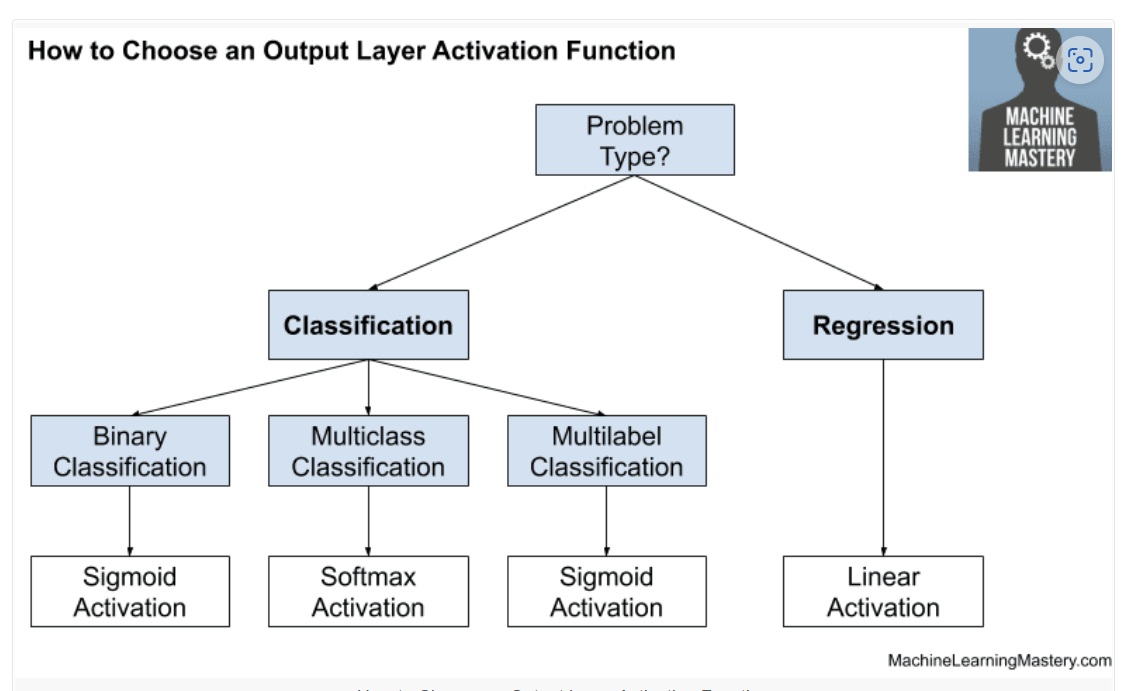

below coding is basic training sample with 
* n_layer = 3
* epochs = 100
* hidden layers function = ReLU
* Output layer function = Sigmoid
* learning rate = 0.01
* optimizer = RMSprop

In [26]:
# this is a basic sample. 
# condition : n layer = 3, epochs = 100
# hidden activation function = ReLU, Output activation function = Sigmoid
# learning rate = 0.01 
# optimizer = RMSprop

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net1.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-26-691aab2b7245>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.1312597095966339
Loss: 0.12687769532203674
Loss: 0.1267751008272171
Loss: 0.12672683596611023
Loss: 0.12670913338661194
Loss: 0.12674419581890106
Loss: 0.12674997746944427
Loss: 0.12680834531784058
Loss: 0.12685035169124603
Loss: 0.12684454023838043


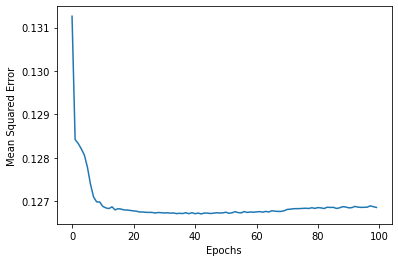

In [27]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

### Test_01 (by n_layer: 4 layers include outlayer)

In [28]:
# condition : n layer = 4, epochs = 100
# hidden activation function = ReLU, Output activation function = Sigmoid
# learning rate = 0.01 
# optimizer = RMSprop

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}


# 1. Creating a FeedForwardNetwork
model_net2 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,3),
                         torch.nn.ReLU(),
                         torch.nn.Linear(3,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net2.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-28-d55fe1de6eee>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.13247552514076233
Loss: 0.12823998928070068
Loss: 0.12814190983772278
Loss: 0.12805694341659546
Loss: 0.12761344015598297
Loss: 0.12745004892349243
Loss: 0.12757575511932373
Loss: 0.12791140377521515
Loss: 0.12808963656425476
Loss: 0.12776322662830353


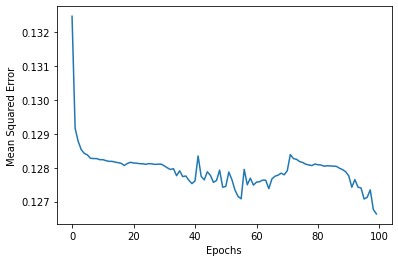

In [29]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## The result of ***'n_layer = 3'*** is better.

### Test_02 (by learning rate : 0.05)

In [30]:
# condition : n layer = 3, epochs = 100
# hidden activation function = ReLU, Output activation function = Sigmoid
# learning rate = 0.05
# optimizer = RMSprop

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.05
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net1.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-30-bab2296823ae>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.13662943243980408
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738
Loss: 0.13640829920768738


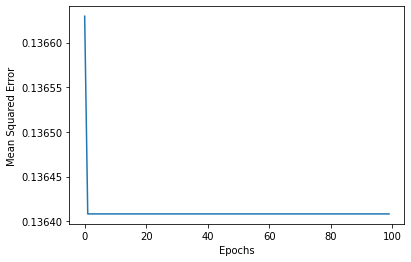

In [31]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

### the Result of the training with **learning rate = 0.01** is better.

### Test_03 (by hidden activation function ReLU to Tanh)

In [32]:
# condition : n layer = 3, epochs = 100
# hidden activation function = Tanh, Output activation function = Sigmoid
# learning rate = 0.01 
# optimizer = RMSprop

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net2 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.Tanh(),
                         torch.nn.Linear(6,5),
                         torch.nn.Tanh(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net2.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-32-2c949e9b6cce>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.13201366364955902
Loss: 0.1255737841129303
Loss: 0.12605951726436615
Loss: 0.12536312639713287
Loss: 0.12455091625452042
Loss: 0.12217842042446136
Loss: 0.12143524736166
Loss: 0.12345422059297562
Loss: 0.12350433319807053
Loss: 0.12344937771558762


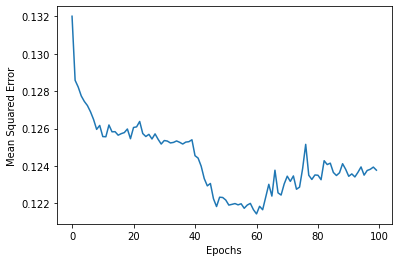

In [33]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

### the Result of the training with **hidden layer function = Tanh** is better.

### Test_04 (by Output activation function Sigmoid to Softmax)

In [34]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net3 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Softmax()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-34-c02d22d270aa>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366
Loss: 0.8388017416000366


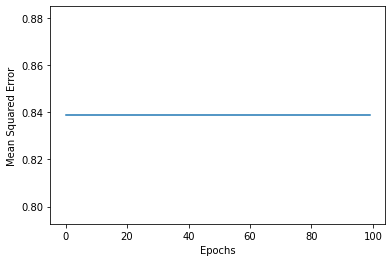

In [35]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

### the Result of the training with **'Output layer function = Sigmoid'** is better.

Test_05 (by Optimizer RMSprop to Adam)

In [36]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_net1.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net1.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-36-c43b19478d35>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.13253355026245117
Loss: 0.1276884227991104
Loss: 0.12752419710159302
Loss: 0.12728045880794525
Loss: 0.12712830305099487
Loss: 0.12689664959907532
Loss: 0.12690578401088715
Loss: 0.12659934163093567
Loss: 0.12671376764774323
Loss: 0.12665922939777374


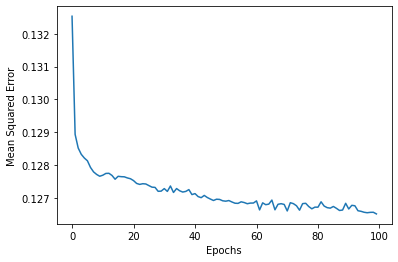

In [37]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

### the Result of the training with  **'optimizer = Adam'**  is better.

From the training, we found out the best model with following conditions.

* n_layer = 3
* epochs = 100 (best epochs = 60)
* hidden layers function = Tanh
* Output layer function = Sigmoid
* learning rate = 0.01
* optimizer = Adam

In [38]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.Tanh(),
                         torch.nn.Linear(6,5),
                         torch.nn.Tanh(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-38-85bfad6bba65>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.1335998773574829
Loss: 0.12673448026180267
Loss: 0.12516048550605774
Loss: 0.12289618700742722
Loss: 0.12259934842586517
Loss: 0.12298157066106796
Loss: 0.12182969599962234
Loss: 0.12103929370641708
Loss: 0.11923351883888245
Loss: 0.11922450363636017


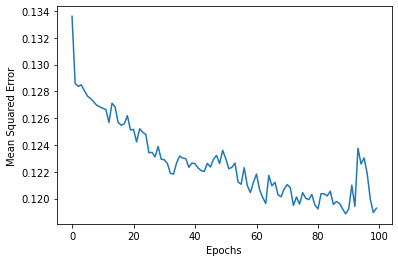

In [39]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [40]:
# save the trained model
torch.save(model_net4, 'model_net4.pkl')

In [41]:
model = torch.load('model_net4.pkl')
model.eval()

Sequential(
  (0): Linear(in_features=4, out_features=6, bias=True)
  (1): Tanh()
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): Tanh()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

# Testing the trained model with our test data

In [46]:
X_test

tensor([[0.2750, 0.0759, 1.0000, 0.0000],
        [0.3000, 0.1725, 0.6667, 0.3333],
        [0.2250, 0.0591, 0.0000, 0.6667],
        ...,
        [0.3250, 0.0913, 0.3333, 0.6667],
        [0.2500, 0.0753, 0.3333, 0.3333],
        [0.5750, 0.0722, 0.6667, 0.6667]])

In [44]:
model(torch.tensor([0.2750, 0.0759, 1.0000, 0.0000]))

tensor([0.4592], grad_fn=<SigmoidBackward0>)